## 21DS601&21MA602 (21-22(ODD)) TERM PROJECT 

## Submitted by : CB.EN.P2DSC21032 - YAZHINI V 

## Submitted on : 15-02-2022 

## Aerial Image Classification Using Different SVM Kernels 
 

### Importing Libraries 

In [1]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
import numpy as np 
import pandas as pd

### Importing Tree class and applying SVD

Working with 105 images
Image examples: 
500_15.jpg


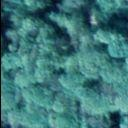

500_16.jpg


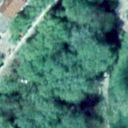

500_17.jpg


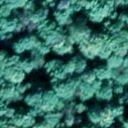

500_18.jpg


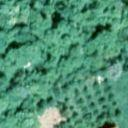

500_19.jpg


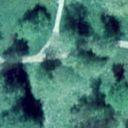

500_2.jpg


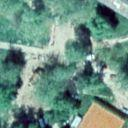

500_20.jpg


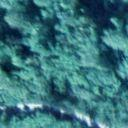

500_21.jpg


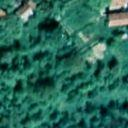

In [30]:
folder = r"E:\Yazhini\Dataset\Aerial\tree"
encoded = folder.encode("UTF-8")
folder = encoded.decode("UTF-8")
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(12, 20):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=128, height=128))


Files in train_files: 105
All images to array!


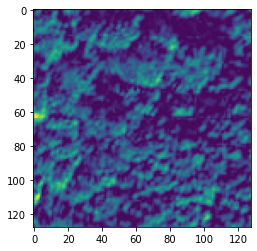

In [32]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd
import matplotlib.pyplot as plt
train_files = []
y_train1 = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train1.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))
# Original Dimensions
image_width = 128
image_height = 128
ratio = 1

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)



dataset1 = np.ndarray(shape=(len(train_files), image_height, image_width),
                     dtype=np.float32)


i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    #img.thumbnail((image_width, image_height))

    
    data =img.getdata(0)
    # convert to numpy array 
    img_mat = np.array(list(data), float) 
    #print(img_mat.size)
    # get image shape
    img_mat.shape = (img.size[1], img.size[0])
    # conver to 1d-array to matrix
    img_mat = np.matrix(img_mat)
    #print(img_mat)

    img_mat= (img_mat-img_mat.mean())/img_mat.std()
    U, s, V = np.linalg.svd(img_mat)   
    num_components = 70
    img_mat = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(V[:num_components, :])    
    plt.imshow(img_mat)   
    dataset1[i] = img_mat
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")


### Train and Test Split for Tree class 

In [33]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(dataset1, y_train1, test_size=0.2, random_state=33)
nsamples, nx, ny = X1_train.shape
X1_train = X1_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X1_test.shape
X1_test = X1_test.reshape((nsamples,nx*ny))
print(X1_train.shape)
print(len(y1_train))


(84, 16384)
84


### Importing Industry class and applying SVD 

Working with 75 images
Image examples: 
400_2.jpg


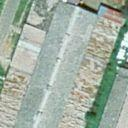

400_20.jpg


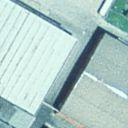

400_21.jpg


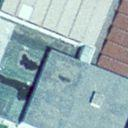

400_22.jpg


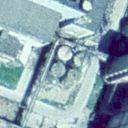

400_23.jpg


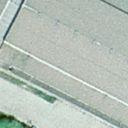

400_24.jpg


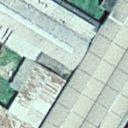

400_25.jpg


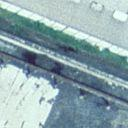

400_26.jpg


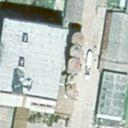

In [34]:
folder = r"E:\Yazhini\Dataset\Aerial\industry"
encoded = folder.encode("UTF-8")
folder = encoded.decode("UTF-8")
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(12, 20):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=128, height=128))

Files in train_files: 75
All images to array!


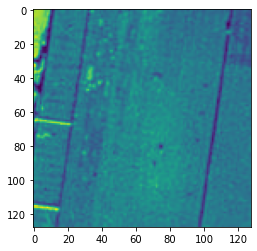

In [35]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd
import matplotlib.pyplot as plt
train_files = []
y_train2 = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train2.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))
# Original Dimensions
image_width = 128
image_height = 128
ratio = 1

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)


dataset2 = np.ndarray(shape=(len(train_files), image_height, image_width),
                     dtype=np.float32)


i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
     
    data =img.getdata(0)
    # convert to numpy array 
    img_mat = np.array(list(data), float) 
    #print(img_mat.size)
    # get image shape
    img_mat.shape = (img.size[1], img.size[0])
    # conver to 1d-array to matrix
    img_mat = np.matrix(img_mat)
    #print(img_mat)
   
    img_mat= (img_mat-img_mat.mean())/img_mat.std()
    U, s, V = np.linalg.svd(img_mat)   
    num_components = 70
    img_mat = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(V[:num_components, :])    
    plt.imshow(img_mat)    
    
    dataset2[i] = img_mat
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

### Train and Test Split for Industry class 

In [36]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(dataset2, y_train2, test_size=0.2, random_state=33)
nsamples, nx, ny = X2_train.shape
X2_train = X2_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X2_test.shape
X2_test = X2_test.reshape((nsamples,nx*ny))
print(X2_train.shape)
print(len(y2_train))

(60, 16384)
60


### Importing House class and applying SVD 

Working with 143 images
Image examples: 
300_109.jpg


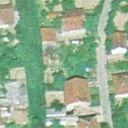

300_11.jpg


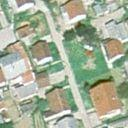

300_110.jpg


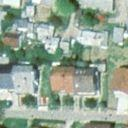

300_111.jpg


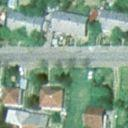

300_112.jpg


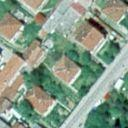

300_113.jpg


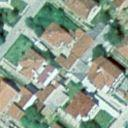

300_114.jpg


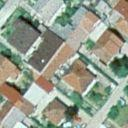

300_115.jpg


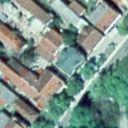

In [37]:
folder = r"E:\Yazhini\Dataset\Aerial\house"
encoded = folder.encode("UTF-8")
folder = encoded.decode("UTF-8")
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(12, 20):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=128, height=128))


Files in train_files: 143
All images to array!


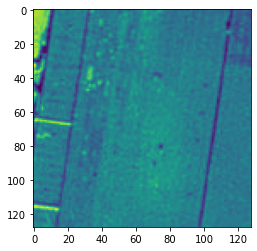

In [38]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd
import matplotlib.pyplot as plt
train_files = []
y_train3 = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train3.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))
# Original Dimensions
image_width = 128
image_height = 128
ratio = 1

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)



dataset3 = np.ndarray(shape=(len(train_files), image_height, image_width),
                     dtype=np.float32)


i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
     
    data =img.getdata(0)
    # convert to numpy array 
    img_mat = np.array(list(data), float) 
    #print(img_mat.size)
    # get image shape
    img_mat.shape = (img.size[1], img.size[0])
    # conver to 1d-array to matrix
    img_mat = np.matrix(img_mat)
    #print(img_mat)
    num_components = 128
    img_mat = np.matrix(U[:, :num_components]) * np.diag(s[:num_components]) * np.matrix(V[:num_components, :])    
    plt.imshow(img_mat) 
    
    
    dataset3[i] = img_mat
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

### Train and Test Split for House class 

In [39]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(dataset3, y_train3, test_size=0.2, random_state=33)
nsamples, nx, ny = X3_train.shape
X3_train = X3_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X3_test.shape
X3_test = X3_test.reshape((nsamples,nx*ny))
print(X3_train.shape)
print(len(y3_train))

(114, 16384)
114


### Concatenating all the train and test 

In [40]:
y11_train=np.concatenate((y1_train, y2_train, y3_train))
y11_test=np.concatenate((y1_test, y2_test, y3_test))
X11_train=np.vstack((X1_train, X2_train, X3_train))
X11_test=np.vstack((X1_test, X2_test, X3_test))
print(X11_train.shape)
print(y11_train.shape)
print(X11_test.shape)
print(y11_test.shape)

(258, 16384)
(258,)
(65, 16384)
(65,)


### Finding best parameters for our model¶ 

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},{'kernel': ['poly'], 'C': [1, 10, 100, 1000],'degree': [1, 10]}]
                    
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X11_train, y11_train)
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
print('Best degree:',svm_model.best_estimator_.degree,"\n")


Best C: 10 

Best Gamma: 0.0001 

Best degree: 3 



### Applying SVM - Linear Kernel

<AxesSubplot:>

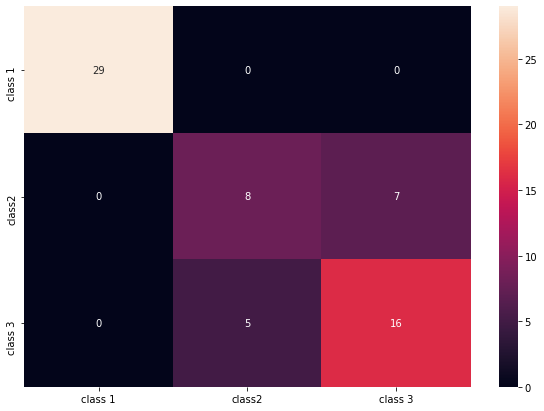

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import seaborn as sn
classifier = SVC(kernel='linear',C=10)
classifier.fit(X11_train,y11_train)
Y4_pred = classifier.predict(X11_test)
cm2 = confusion_matrix(y11_test,Y4_pred)
df_cm = pd.DataFrame(cm2, index = [ 'class 1', 'class2', 'class 3'],
                  columns = [ 'class 1', 'class2', 'class 3'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [44]:
from sklearn import metrics
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y11_test, Y4_pred, target_names=target_names, digits=4))
accuracy1 = metrics.accuracy_score(y11_test, Y4_pred) 
print("Accuracy score:",accuracy1)

              precision    recall  f1-score   support

     class 1     1.0000    1.0000    1.0000        29
     class 2     0.6154    0.5333    0.5714        15
     class 3     0.6957    0.7619    0.7273        21

    accuracy                         0.8154        65
   macro avg     0.7703    0.7651    0.7662        65
weighted avg     0.8129    0.8154    0.8130        65

Accuracy score: 0.8153846153846154


### Applying SVM - Polynomial Kernel 

<AxesSubplot:>

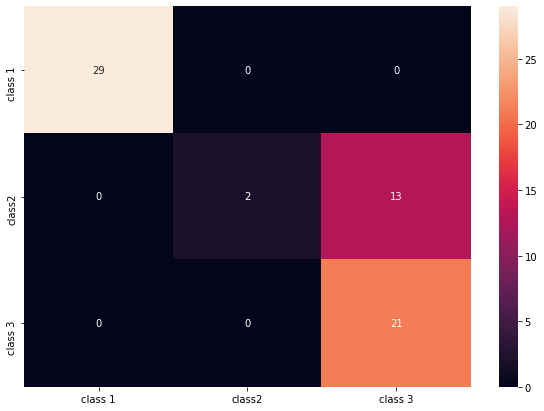

In [15]:
from sklearn.svm import SVC
classifier = SVC( kernel="poly",degree=3,C=10)
classifier.fit(X11_train, y11_train)
Y5_pred = classifier.predict(X11_test)
cm = metrics.confusion_matrix(y11_test, Y5_pred) 
df_cm = pd.DataFrame(cm, index = [ 'class 1', 'class2', 'class 3'],
                  columns = [ 'class 1', 'class2', 'class 3'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [16]:
print(classification_report(y11_test, Y5_pred, target_names=target_names, digits=4))
accuracy5 = metrics.accuracy_score(y11_test, Y5_pred) 
print("Accuracy score:",accuracy5)

              precision    recall  f1-score   support

     class 1     1.0000    1.0000    1.0000        29
     class 2     1.0000    0.1333    0.2353        15
     class 3     0.6176    1.0000    0.7636        21

    accuracy                         0.8000        65
   macro avg     0.8725    0.7111    0.6663        65
weighted avg     0.8765    0.8000    0.7472        65

Accuracy score: 0.8


### Applying SVM - RBF Kernel 

<AxesSubplot:>

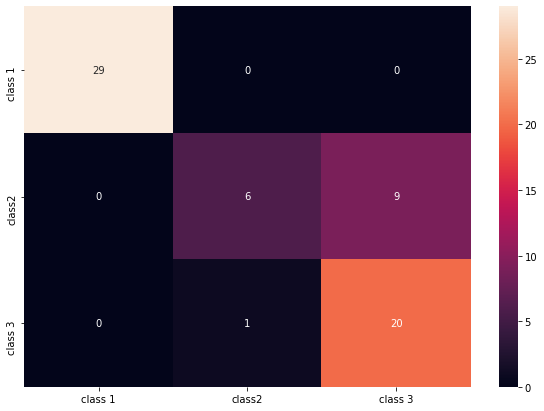

In [17]:
from sklearn.svm import SVC
classifier = SVC( kernel="rbf",gamma=0.0001,C=10)
classifier.fit(X11_train, y11_train)
Y6_pred = classifier.predict(X11_test)
cm = metrics.confusion_matrix(y11_test, Y6_pred) 
df_cm = pd.DataFrame(cm, index = [ 'class 1', 'class2', 'class 3'],
                  columns = [ 'class 1', 'class2', 'class 3'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [18]:
print(classification_report(y11_test, Y6_pred, target_names=target_names, digits=4))
accuracy6 = metrics.accuracy_score(y11_test, Y6_pred) 
print("Accuracy score:",accuracy6)

              precision    recall  f1-score   support

     class 1     1.0000    1.0000    1.0000        29
     class 2     0.8571    0.4000    0.5455        15
     class 3     0.6897    0.9524    0.8000        21

    accuracy                         0.8462        65
   macro avg     0.8489    0.7841    0.7818        65
weighted avg     0.8668    0.8462    0.8305        65

Accuracy score: 0.8461538461538461


### Applying SVM - Sigmoid Kernel 

<AxesSubplot:>

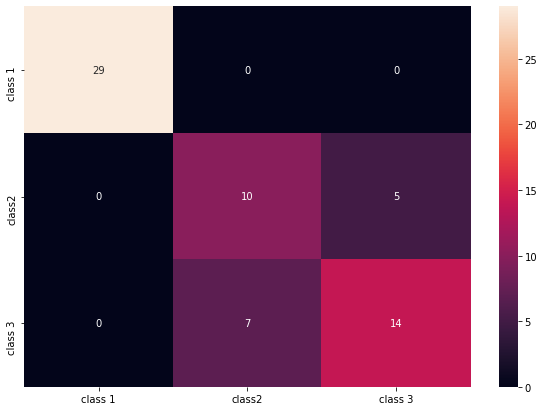

In [23]:
from sklearn.svm import SVC
classifier = SVC( kernel="sigmoid",C=10)
classifier.fit(X11_train, y11_train)
Y7_pred = classifier.predict(X11_test)
cm = metrics.confusion_matrix(y11_test, Y7_pred) 
df_cm = pd.DataFrame(cm, index = [ 'class 1', 'class2', 'class 3'],
                  columns = [ 'class 1', 'class2', 'class 3'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [24]:
print(classification_report(y11_test, Y7_pred, target_names=target_names, digits=4))
accuracy7 = metrics.accuracy_score(y11_test, Y7_pred) 
print("Accuracy score:",accuracy7)

              precision    recall  f1-score   support

     class 1     1.0000    1.0000    1.0000        29
     class 2     0.5882    0.6667    0.6250        15
     class 3     0.7368    0.6667    0.7000        21

    accuracy                         0.8154        65
   macro avg     0.7750    0.7778    0.7750        65
weighted avg     0.8200    0.8154    0.8165        65

Accuracy score: 0.8153846153846154
